# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

# Data Preprocess

Import Data

In [2]:
missing_values =  ["NaN"]
df_raw = pd.read_csv('ks-projects-201801.csv',na_values = missing_values, error_bad_lines=False)
df_raw.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df_raw = df_raw.replace(np.nan, '0', regex=True)
df_raw.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [5]:
df_raw.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283,1283.0,19500.00


In [7]:
df_raw['goal'] = df_raw['goal'].astype('int')
df_raw['pledged'] = df_raw['pledged'].astype('int')
df_raw

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000,2016-02-01 20:05:12,453,failed,40,US,453,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000,2014-07-11 21:55:48,6240,canceled,43,US,6240.57,6240.57,65000.00


In [8]:
print(df_raw.shape)


(378661, 15)


In [9]:
df_raw.groupby('main_category').count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153
Comics,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819
Crafts,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809
Dance,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
Design,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070
Fashion,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816
Film & Video,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585
Food,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602
Games,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231


In [10]:
df_grp_maincate = df_raw.groupby('main_category').count().reset_index()[['main_category','country']].sort_values('country',ascending=False)
df_grp_maincate['main-category_count']=df_grp_maincate['country'].cumsum()
df_grp_maincate['pcg_csum']=df_grp_maincate['main-category_count']/df_grp_maincate['main-category_count'].max()
#df_grp_maincate = df_grp_body[df_grp_body['pcg_csum']<=0.95]

In [11]:
df_grp_maincate.head(5)

,main_category,country,main-category_count,pcg_csum
6,Film & Video,63585,63585,0.167921
10,Music,51918,115503,0.305030
12,Publishing,39874,155377,0.410333
8,Games,35231,190608,0.503374
13,Technology,32569,223177,0.589385


In [12]:
print(df_grp_maincate.shape)

(15, 4)


In [13]:
df_raw = df_raw[df_raw['main_category'].isin(df_grp_maincate['main_category'])]

In [14]:
print(df_raw.shape)

(378661, 15)


# Measure of Central Tendency and Variance

In [15]:
df_raw.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682944e+03,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563599e+04,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


In [16]:
print(df_raw['backers'].describe())
df_raw['backers'].describe()['mean']

count    378661.000000
mean        105.617476
std         907.185035
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64


105.61747578969052

In [17]:
print(df_raw['backers'].median())
print(df_raw['backers'].mode())

12.0
0    0
dtype: int64


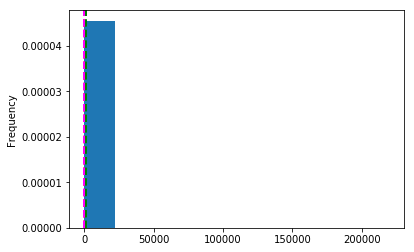

In [20]:
df_raw['backers'].plot.hist(bins=10,density=True)
plt.axvline(df_raw['backers'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_raw['backers'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_raw['backers'].describe()['mean']+df_raw['backers'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)

Distribution Fit

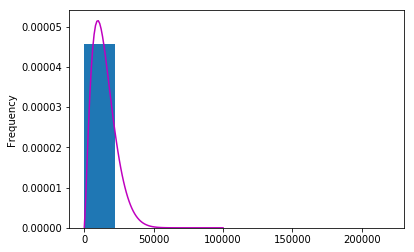

In [35]:
from scipy.stats import beta as beta_fun
fig, ax = plt.subplots(1, 1)
df_raw['backers'].plot.hist(bins=10,density=True)

alpha = 2.4
beta = 14
x = np.linspace(0,1, 100)
plt.plot(100000*x, beta_fun.pdf(x,alpha,beta)/100000,'m-', lw=1.5, alpha=1, label='norm pdf')

x = np.linspace(0,1000, 10)
plt.plot(x, norm.pdf(x,df_raw['backers'].describe()['mean'],df_raw['backers'].describe()['std']-2000)
         ,'r-', lw=1.5, alpha=1, label='expon pdf')

In [30]:
Exp_value = alpha/(alpha+beta)*100000
print(Exp_value)

14110.429447852759


# Chi Square Test

Melihat Hubungan kategori

In [22]:
df_pivot=df_raw.groupby(['main_category','category']).count()[['country','backers']].reset_index()

In [23]:
df_pivot.head(5)

,main_category,category,country,backers
0,Art,Art,8253,8253
1,Art,Ceramics,305,305
2,Art,Conceptual Art,1030,1030
3,Art,Digital Art,1346,1346
4,Art,Illustration,3175,3175


In [24]:
df_pivot = df_pivot.pivot(index="main_category",columns="category", values='backers').fillna(0)

In [25]:
df_pivot.head(5)

category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
main_category,,,,,,,,,,,,,,,,,,,,,
Art,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comics,0.0,0.0,0.0,0.0,0.0,0.0,405.0,0.0,0.0,0.0,...,0.0,0.0,0.0,648.0,0.0,0.0,0.0,0.0,0.0,0.0
Crafts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,93.0,0.0,0.0,0.0,1167.0,0.0,0.0,0.0,0.0
Dance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,0.0,0.0
Design,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 5153170.51
p-value: 0.0000


Ada hubungan antara Main category dengan backers

In [27]:
df_pivot=df_raw.groupby(['country','category']).count()[['main_category','backers']].reset_index()
df_pivot

,country,category,main_category,backers
0,AT,3D Printing,5,5
1,AT,Academic,1,1
2,AT,Accessories,3,3
3,AT,Action,2,2
4,AT,Animation,3,3
5,AT,Anthologies,1,1
6,AT,Apparel,17,17
7,AT,Apps,25,25
8,AT,Architecture,1,1
9,AT,Art,14,14


In [28]:
df_pivot=df_raw.groupby(['country','category']).count()[['main_category','backers']].reset_index()
df_pivot = df_pivot.pivot(index="country",columns="category", values='backers').fillna(0)
df_pivot.head(5)

category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,...,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
country,,,,,,,,,,,,,,,,,,,,,
AT,5.0,1.0,3.0,2.0,0.0,3.0,1.0,17.0,25.0,1.0,...,5.0,0.0,17.0,1.0,6.0,6.0,0.0,2.0,1.0,0.0
AU,19.0,22.0,127.0,19.0,11.0,44.0,23.0,258.0,300.0,30.0,...,29.0,4.0,248.0,10.0,88.0,17.0,4.0,17.0,26.0,15.0
BE,2.0,3.0,6.0,2.0,1.0,5.0,1.0,18.0,26.0,1.0,...,1.0,0.0,19.0,2.0,2.0,4.0,0.0,4.0,2.0,0.0
CA,44.0,50.0,209.0,36.0,18.0,105.0,52.0,361.0,372.0,42.0,...,79.0,6.0,332.0,63.0,173.0,47.0,13.0,63.0,49.0,30.0
CH,1.0,2.0,23.0,0.0,0.0,4.0,0.0,13.0,47.0,0.0,...,6.0,0.0,32.0,0.0,2.0,4.0,0.0,3.0,2.0,0.0


In [29]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 78094.06
p-value: 0.0000


Ada hubungan antara country dengan category

# Two sample Test

In [36]:
df_make_smy=df_raw.groupby('category').agg({'backers':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [37]:
df_make_smy.sort_values('count',ascending=False).head(5)

,,count,mean
113,Product Design,22314,276.907457
39,Documentary,16139,89.700539
90,Music,15727,55.059325
136,Tabletop Games,14180,426.601199
129,Shorts,12357,36.731326


In [38]:
df_prodes = df_raw[df_raw['category']=='Product Design']
df_docu = df_raw[df_raw['category']=='Documentary']

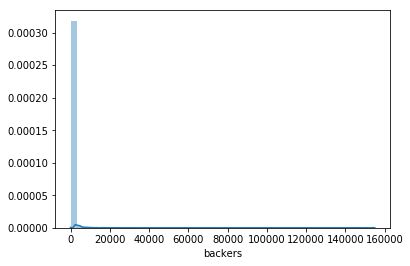

In [39]:
sns.distplot(df_prodes['backers'])

The graphic for product design related braces

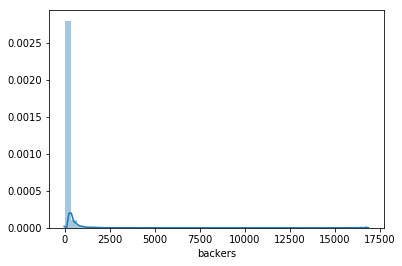

In [40]:
sns.distplot(df_docu['backers'])

The graphic for documentary related braces

Product Design sample mean:276.90745720175676
Product Design sample std:1741.6066347321157
Product Design Kurtosis:3294.379367648098
Documentary sample mean:89.70053906685668
t-statistic:-15.734838482749915
p-value:0.000000


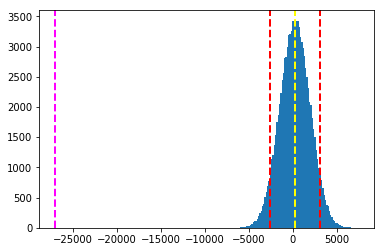

In [41]:
np.random.seed(123)
nonMath =df_prodes['backers']
math = df_docu['backers']
print("Product Design sample mean:" + str(nonMath.mean()))
print("Product Design sample std:" + str(nonMath.std()))
print("Product Design Kurtosis:" + str(nonMath.kurtosis()))
print("Documentary sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

From Graphic two sample graphic, we got have a iteraction the category with backers. It's proven by product design & documentary which have significant P-values for braces.